In [1]:
import os
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load results

In [2]:
base_models = ['CNN', 'CNN_ATT', 'CNN_LSTM_ATT', 'CNN_LSTM_TRANS1', 'CNN_LSTM_TRANS2', 'CNN_LSTM_TRANS4',
               'CNN2', 'CNN2_ATT', 'CNN2_LSTM_ATT', 'CNN2_LSTM_TRANS1', 'CNN2_LSTM_TRANS2', 'CNN2_LSTM_TRANS4',
               'CNN_LSTM2', 'CNN_LSTM2_ATT', 'CNN_LSTM2_TRANS1', 'CNN_LSTM2_TRANS2', 'CNN_LSTM2_TRANS4',]
activations = ['relu', 'exponential']
num_trials = 10
keep = 3 # number of best experiments to keep -- criterion is set by test performance
results_path = '../results_task1'

results_mean = {}
results_std = {}
results_all = {}
for model in base_models:
    for activation in activations:
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path, model_name +'_stats.npy')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load filter-motif analysis stats
                stats = np.load(stats_dir, allow_pickle=True)

                # load classificaiton performance stats
                logs_dir = os.path.join(results_path, model_name+'_logs.pickle')
                with open(logs_dir, 'rb') as handle:
                    history = cPickle.load(handle)
                    results = cPickle.load(handle)
                trial_stats.append([results[2], stats[0], stats[1]-stats[0]]) # AUPR, TPR, FPR
        vals =  np.array(trial_stats)
        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results_all[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.std(vals, axis=0)

# Print results to table

In [3]:
fout = open('task1_results_table.tsv', 'w')
fout.write('%s\t%s\t%s\t%s\n'%('Model', 'AUPR', 'TPR', 'FPR'))
for key in results_mean:
    fout.write("%s\t%.3f+/-%.3f\t%.3f+/-%.3f\t%.3f+/-%.3f\n"%(key, 
                                                              results_mean[key][0], results_std[key][0],
                                                              results_mean[key][1], results_std[key][1],
                                                              results_mean[key][2], results_std[key][2]))
fout.close()

# Generate Figure 1

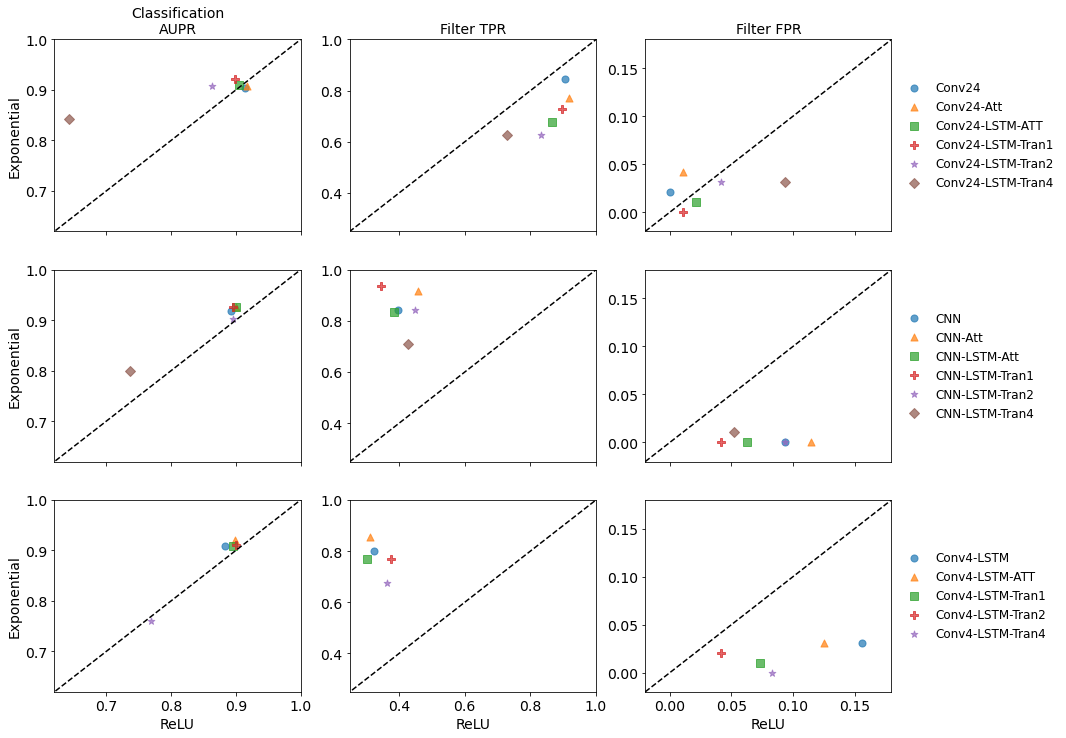

In [4]:
activations = ['relu', 'exponential']
num_trials = 10
keep = 3
marker = 'o^sP*DX'
fig = plt.figure(figsize=(15,12))



base_models = ['CNN', 'CNN_ATT', 'CNN_LSTM_ATT', 'CNN_LSTM_TRANS1', 'CNN_LSTM_TRANS2', 'CNN_LSTM_TRANS4']
legend_names = ['Conv24', 'Conv24-Att', 'Conv24-LSTM-ATT', 'Conv24-LSTM-Tran1', 'Conv24-LSTM-Tran2', 'Conv24-LSTM-Tran4']

results_mean = {}
results_std = {}
results_all = {}
for model in base_models:
    for activation in activations:
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path, model_name +'_stats.npy')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load filter-motif analysis stats
                stats = np.load(stats_dir, allow_pickle=True)

                # load classificaiton performance stats
                logs_dir = os.path.join(results_path, model_name+'_logs.pickle')
                with open(logs_dir, 'rb') as handle:
                    history = cPickle.load(handle)
                    results = cPickle.load(handle)
                trial_stats.append([results[2], stats[0], stats[1]-stats[0]]) # AUPR, TPR, FPR
        vals =  np.array(trial_stats)
        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results_all[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.std(vals, axis=0)
            
ax = plt.subplot(3,3,1)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.62,1])
plt.ylim([0.62,1])
plt.yticks([0.7,  0.8, 0.9, 1.0], fontsize=14)
plt.xticks([0.7,  0.8, 0.9, 1.0], "", fontsize=14)
plt.ylabel('Exponential', fontsize=14)
#plt.xlabel('ReLU', fontsize=14)
plt.title('Classification\nAUPR', fontsize=14)

ax = plt.subplot(3,3,2)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.25,1])
plt.ylim([0.25,1])
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.4,  0.6, 0.8, 1.0], fontsize=14)
plt.xticks([0.4,  0.6, 0.8, 1.0], "", fontsize=14)
plt.title('Filter TPR', fontsize=14)


ax = plt.subplot(3,3,3)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))
plt.plot([-0.02,1],[-.02,1], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.02,.18])
plt.ylim([-0.02,.18])
plt.yticks([0., 0.05, 0.1, 0.15], fontsize=14)
plt.xticks([0., 0.05, 0.1, 0.15 ], "", fontsize=14)
plt.title('Filter FPR', fontsize=14)



base_models = ['CNN2', 'CNN2_ATT', 'CNN2_LSTM_ATT', 'CNN2_LSTM_TRANS1', 'CNN2_LSTM_TRANS2', 'CNN2_LSTM_TRANS4']
legend_names = ['CNN', 'CNN-Att', 'CNN-LSTM-Att', 'CNN-LSTM-Tran1', 'CNN-LSTM-Tran2', 'CNN-LSTM-Tran4']
results_mean = {}
results_std = {}
results_all = {}
for model in base_models:
    for activation in activations:
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path, model_name +'_stats.npy')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load filter-motif analysis stats
                stats = np.load(stats_dir, allow_pickle=True)

                # load classificaiton performance stats
                logs_dir = os.path.join(results_path, model_name+'_logs.pickle')
                with open(logs_dir, 'rb') as handle:
                    history = cPickle.load(handle)
                    results = cPickle.load(handle)
                trial_stats.append([results[2], stats[0], stats[1]-stats[0]]) # AUPR, TPR, FPR
        vals =  np.array(trial_stats)
        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results_all[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.std(vals, axis=0)
            
ax = plt.subplot(3,3,4)
for i, base_model in enumerate(base_models):    
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)

plt.plot([0,1],[0,1], '--k')
plt.xlim([0.62,1])
plt.ylim([0.62,1])
plt.ylabel('Exponential', fontsize=14)
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.7,  0.8, 0.9, 1.0], fontsize=14)
plt.xticks([0.7,  0.8, 0.9, 1.0], "", fontsize=14)


ax = plt.subplot(3,3,5)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.25,1])
plt.ylim([0.25,1])
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.4,  0.6, 0.8, 1.0], fontsize=14)
plt.xticks([0.4,  0.6, 0.8, 1.0], "", fontsize=14)

ax = plt.subplot(3,3,6)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))
plt.plot([-0.02,1],[-.02,1], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.02,.18])
plt.ylim([-0.02,.18])
plt.yticks([0., 0.05, 0.1, 0.15], fontsize=14)
plt.xticks([0., 0.05, 0.1, 0.15 ], "", fontsize=14)


base_models = ['CNN_LSTM2', 'CNN_LSTM2_ATT', 'CNN_LSTM2_TRANS1', 'CNN_LSTM2_TRANS2', 'CNN_LSTM2_TRANS4']
legend_names = ['Conv4-LSTM', 'Conv4-LSTM-ATT', 'Conv4-LSTM-Tran1', 'Conv4-LSTM-Tran2', 'Conv4-LSTM-Tran4']
results_mean = {}
results_std = {}
results_all = {}
for model in base_models:
    for activation in activations:
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path, model_name +'_stats.npy')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load filter-motif analysis stats
                stats = np.load(stats_dir, allow_pickle=True)

                # load classificaiton performance stats
                logs_dir = os.path.join(results_path, model_name+'_logs.pickle')
                with open(logs_dir, 'rb') as handle:
                    history = cPickle.load(handle)
                    results = cPickle.load(handle)
                trial_stats.append([results[2], stats[0], stats[1]-stats[0]]) # AUPR, TPR, FPR
        vals =  np.array(trial_stats)
        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results_all[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.std(vals, axis=0)
            
ax = plt.subplot(3,3,7)
for i, base_model in enumerate(base_models):    
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.62,1])
plt.ylim([0.62,1])
plt.ylabel('Exponential', fontsize=14)
plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.7,  0.8, 0.9, 1.0], fontsize=14)
plt.xticks([0.7,  0.8, 0.9, 1.0], fontsize=14)


ax = plt.subplot(3,3,8)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.25,1])
plt.ylim([0.25,1])
plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.4,  0.6, 0.8, 1.0], fontsize=14)
plt.xticks([0.4,  0.6, 0.8, 1.0], fontsize=14)

ax = plt.subplot(3,3,9)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))
plt.plot([-0.02,1],[-.02,1], '--k')
plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.02,.18])
plt.ylim([-0.02,.18])
plt.yticks([0., 0.05, 0.1, 0.15], fontsize=14)
plt.xticks([0., 0.05, 0.1, 0.15 ], fontsize=14)


fig.savefig('task1_results.pdf', format='pdf', dpi=200, bbox_inches='tight')
